In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import gdal
import glob, os

!pip install fiona
!pip install rasterio
import fiona
import rasterio

%config InlineBackend.figure_format = 'retina'

In [2]:
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 1.0 MB 7.9 MB/s 
     |████████████████████████████████| 6.3 MB 37.8 MB/s 


In [3]:
!git clone https://github.com/yohanesnuwara/PalmCV

Cloning into 'PalmCV'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 8 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.


In [4]:
!unzip /content/PalmCV/TRAIN_DATA.zip

Archive:  /content/PalmCV/TRAIN_DATA.zip
   creating: TRAIN_DATA/
   creating: TRAIN_DATA/tile_1050_1050/
  inflating: TRAIN_DATA/tile_1050_1050/tile_1050_1050.cpg  
  inflating: TRAIN_DATA/tile_1050_1050/tile_1050_1050.dbf  
  inflating: TRAIN_DATA/tile_1050_1050/tile_1050_1050.prj  
  inflating: TRAIN_DATA/tile_1050_1050/tile_1050_1050.shp  
  inflating: TRAIN_DATA/tile_1050_1050/tile_1050_1050.shx  
  inflating: TRAIN_DATA/tile_1050_1050/tile_1050_1050.tif  
   creating: TRAIN_DATA/tile_1050_1400/
  inflating: TRAIN_DATA/tile_1050_1400/tile_1050_1400.cpg  
  inflating: TRAIN_DATA/tile_1050_1400/tile_1050_1400.dbf  
  inflating: TRAIN_DATA/tile_1050_1400/tile_1050_1400.prj  
  inflating: TRAIN_DATA/tile_1050_1400/tile_1050_1400.shp  
  inflating: TRAIN_DATA/tile_1050_1400/tile_1050_1400.shx  
  inflating: TRAIN_DATA/tile_1050_1400/tile_1050_1400.tif  
   creating: TRAIN_DATA/tile_1050_1750/
  inflating: TRAIN_DATA/tile_1050_1750/tile_1050_1750.cpg  
  inflating: TRAIN_DATA/tile_1050_

Image CRS: EPSG:4326
Label CRS: epsg:4326


/usr/local/lib/python3.7/dist-packages/rasterio/plot.py:107: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  arr = source.read(rgb_indexes, masked=True)


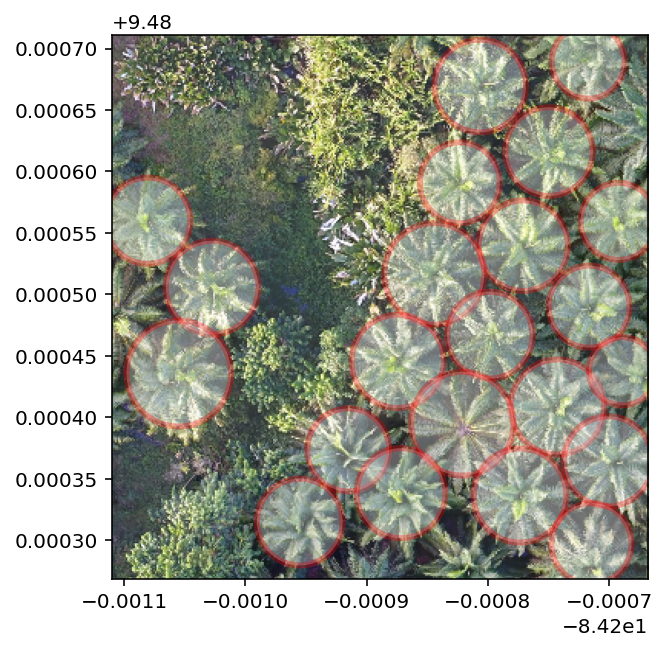

In [37]:
from rasterio.plot import show

# Read raster image
img = rasterio.open('/content/TRAIN_DATA/tile_1050_1050/tile_1050_1050.tif')

# Get image CRS
img_crs = img.crs
print(f'Image CRS: {img_crs}')

# Read shapefile
label_shp = fiona.open('/content/TRAIN_DATA/tile_1050_1050/tile_1050_1050.shp')

# Get CRS of shapefile
label_crs = label_shp.crs['init']
print(f'Label CRS: {label_crs}')

# Convert shapefile to geopandas dataframe
label_gdf = gpd.GeoDataFrame.from_features([feature for feature in label_shp],
                                           crs=label_crs)
label_gdf = label_gdf.to_crs(img_crs) # Transform label CRS to match with image CRS

# Plot image and label
fig, ax = plt.subplots(1,1, figsize=(5,5))
show(img, ax=ax) # image
label_gdf.plot(color='white', edgecolor='red', alpha=0.3, lw=3, ax=ax) # label
plt.show()

In [38]:
# Get image bounds
minx, maxx, miny, maxy = img.bounds.left, img.bounds.right, img.bounds.bottom, img.bounds.top
w_img = maxx - minx
h_img = maxy - miny
print(f'Image width {(w_img*1000):.3f} m and height {(h_img*1000):.3f} m')

for i in range(len(label_gdf)):
  # Get xmin, ymin, xmax, ymax of each label
  minx_label = label_gdf.bounds.minx[i]
  maxx_label = label_gdf.bounds.maxx[i]
  miny_label = label_gdf.bounds.miny[i]
  maxy_label = label_gdf.bounds.maxy[i]

  # Calculate center coordinates, width, height
  w_label = maxx_label - minx_label
  h_label = maxy_label - miny_label
  xc = minx_label + w_label / 2
  yc = miny_label + h_label / 2

  # In normalized value [0 1]
  w_label /= w_img
  h_label /= h_img

  x_center = xc - minx
  y_center = yc - miny
  x_center /= w_img
  y_center /= h_img

  # Print label output
  print(0, x_center, y_center, w_label, h_label) # 0 in the first column is class name

Image width 0.442 m and height 0.442 m
0 0.06712017229371291 0.6583141872413588 0.15868900732706964 0.15874295759637222
0 0.18709661478565492 0.5352814474374938 0.17229348829532506 0.17235206377129778
0 0.12499825512649593 0.377268811019733 0.1949100773839624 0.1949763419173326
0 0.6489154839083335 0.7282739804651335 0.14886543750601566 0.14891604800778094
0 0.6868979757312077 0.9061889718509303 0.17060165581044973 0.17065965609774514
0 0.8153149719722742 0.7855686387081534 0.16308104878610266 0.16313649227959529
0 0.7670832362997045 0.6124784606485497 0.16655669121940309 0.1666133163201139
0 0.6012866449252461 0.5606117173990034 0.18672675245538126 0.18679023485533539
0 0.9449377615923054 0.6571079839108148 0.14181791236025204 0.14186612688812916
0 0.888265472170611 0.9508184951131954 0.13563433849053771 0.1356804507502403
0 0.8900741622711821 0.5003015508276148 0.1508447051540929 0.15089598857332095
0 0.5331593182748917 0.399583572652874 0.1716340054254057 0.17169235666962948
0 0.704

Iterate for all images. Write bounding box result into TXT file, save to tile folder.

In [58]:
# Make data directory
!mkdir /content/palmdata

for f in glob.glob('/content/TRAIN_DATA/*/*.tif'):
  # Read raster image
  # tilename = f.split('/')[-1][:-4]
  # print(tilename)
  img = rasterio.open(f)

  # Get image CRS
  img_crs = img.crs

  # Shapefile path
  shp_path = f[:-4] + '.shp'

  # Read shapefile
  label_shp = fiona.open(shp_path)

  # Get CRS of shapefile
  label_crs = label_shp.crs['init']

  # Convert shapefile to geopandas dataframe
  label_gdf = gpd.GeoDataFrame.from_features([feature for feature in label_shp],
                                            crs=label_crs)
  label_gdf = label_gdf.to_crs(img_crs) # Transform label CRS to match with image CRS

  # Get image bounds
  minx, maxx, miny, maxy = img.bounds.left, img.bounds.right, img.bounds.bottom, img.bounds.top
  w_img = maxx - minx
  h_img = maxy - miny

  # Write 
  txt = open(f[:-4] + '.txt', mode='w')

  # Get label bounding boxes
  for i in range(len(label_gdf)):
    # Get xmin, ymin, xmax, ymax of each label
    minx_label = label_gdf.bounds.minx[i]
    maxx_label = label_gdf.bounds.maxx[i]
    miny_label = label_gdf.bounds.miny[i]
    maxy_label = label_gdf.bounds.maxy[i]

    # Calculate center coordinates, width, height
    w_label = maxx_label - minx_label
    h_label = maxy_label - miny_label
    xc = minx_label + w_label / 2
    yc = miny_label + h_label / 2

    # In normalized value [0 1]
    w_label /= w_img
    h_label /= h_img

    x_center = xc - minx
    y_center = yc - miny
    x_center /= w_img
    y_center /= h_img

    # Write label output
    txt.write(f'0 {x_center} {y_center} {w_label} {h_label} \n') # 0 in the first column is class name
  
  txt.close()

mkdir: cannot create directory ‘/content/palmdata’: File exists


Randomly select 4 tile names to be validation data

In [61]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
from yolov5 import utils

Cloning into 'yolov5'...
remote: Enumerating objects: 12844, done.
remote: Total 12844 (delta 0), reused 0 (delta 0), pack-reused 12844
Receiving objects: 100% (12844/12844), 11.76 MiB | 18.76 MiB/s, done.
Resolving deltas: 100% (8928/8928), done.
/content/yolov5
     |████████████████████████████████| 596 kB 7.8 MB/s 


In [64]:
%%writefile /content/yolov5/palm.yaml
train: /content/palmdata/images/train
val: /content/palmdata/images/validation
nc: 1
names: ["palm"]

Overwriting /content/yolov5/palm.yaml


In [ ]:
!python train.py --img 1000 --batch 16 --epochs 50 --data palm.yaml --weights yolov5s.pt 

train: weights=yolov5s.pt, cfg=, data=palm.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=1000, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-134-gc9a3b14 torch 1.10.0+cu111 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, perspective=